In [1]:
import pyspark

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark= SparkSession.builder.appName("yelp").getOrCreate()

In [4]:
spark

In [8]:
yelp_df= spark.read.json('yelp_dataset\yelp_academic_dataset_business.json')

In [9]:
yelp_df.show(5)

+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|         city|               hours|is_open|  latitude|   longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|1616 Chapala St, ...|{NULL, NULL, NULL...|Pns2l4eNsfO8kk83d...|Doctors, Traditio...|Santa Barbara|                NULL|      0|34.4266787|-119.7111968|Abby Rappoport, L...|      93101|           7|  5.0|   CA|
|87 Grasso Plaza S...|{NULL, NULL, NULL...|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|       Affton|{8:0-18:30, 0:0-0...|      1| 38.551126|  -90.335695|    

In [10]:
# Now we only want the data from the state of Arizona 
yelp_df=yelp_df.filter(yelp_df.state =='AZ')

In [13]:
yelp_df.show(10)

+--------------------+--------------------+--------------------+--------------------+----------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|      city|               hours|is_open|  latitude|   longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+----------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|5255 E Broadway Blvd|{NULL, NULL, NULL...|tUFrWirKiKi_TAnsV...|Department Stores...|    Tucson|{8:0-23:0, 8:0-22...|      0| 32.223236| -110.880452|              Target|      85711|          22|  3.5|   AZ|
|     625 N Stone Ave|{NULL, NULL, NULL...|rBmpy_Y1UbBx8ggHl...|Automotive, Auto ...|    Tucson|{8:0-17:0, 0:0-0:...|      1|32.2298719|-110.9723419|Arizona Truck Out..

In [15]:
yeld_df_c= yelp_df.select('categories').show(truncate=False)

+-------------------------------------------------------------------------------------------------------+
|categories                                                                                             |
+-------------------------------------------------------------------------------------------------------+
|Department Stores, Shopping, Fashion, Home & Garden, Electronics, Furniture Stores                     |
|Automotive, Auto Parts & Supplies, Auto Customization                                                  |
|Restaurants, Chinese                                                                                   |
|Vitamins & Supplements, Ice Cream & Frozen Yogurt, Food, Juice Bars & Smoothies, Shopping              |
|Towing, Hotels & Travel, Automotive, Motorcycle Rental, Motorcycle Gear, Shopping                      |
|Italian, Restaurants                                                                                   |
|Printing Services, Local Services, Shipping C

In [91]:
# now i will filter buisness in category shopping
shopping_df= yelp_df.filter(yelp_df.categories.contains('Shopping'))
shopping_df.show(10)

+--------------------+--------------------+--------------------+--------------------+----------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|      city|               hours|is_open|     latitude|     longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+----------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+-----+-----+
|5255 E Broadway Blvd|{NULL, NULL, NULL...|tUFrWirKiKi_TAnsV...|Department Stores...|    Tucson|{8:0-23:0, 8:0-22...|      0|    32.223236|   -110.880452|              Target|      85711|          22|  3.5|   AZ|
|1070 E Tucson Mar...|{NULL, NULL, NULL...|txyXRytGjwOXvS8s4...|Vitamins & Supple...|    Tucson|{7:0-19:0, 0:0-0:...|      1|    32.186794|   -110.9

In [25]:
# now i will write spark queries to find the top 10 cities with the most businesses in the 'Shopping' category
shopping_df.createOrReplaceTempView('shopping')

In [ ]:
spark.sql('''
select attributes from shopping
         where city='Tucson' 
          ''').show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|attributes                                                                                                                                                                                                                                                                                                                       |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|{NULL, NULL, NULL, NULL, NU

In [109]:
spark.sql('''
select hours from shopping
         where city='Tucson'  and is_open=1
          ''').show(truncate=False)

+-----------------------------------------------------------------------------+
|hours                                                                        |
+-----------------------------------------------------------------------------+
|{7:0-19:0, 0:0-0:0, 9:0-20:0, 11:0-18:0, 7:0-19:0, 7:0-21:0, 7:0-19:0}       |
|{8:30-18:0, 8:30-18:0, 9:0-16:0, NULL, 8:30-18:0, 8:30-18:0, 8:30-18:0}      |
|{9:30-18:0, 9:30-18:0, 9:30-18:0, 12:0-17:0, 9:30-18:0, 9:30-18:0, 9:30-18:0}|
|{7:0-18:0, 9:0-17:0, 9:0-18:0, 10:0-17:0, 7:0-18:0, 7:0-18:0, 7:0-18:0}      |
|{8:0-20:0, 0:0-0:0, 8:0-20:0, 8:0-21:0, 8:0-20:0, 7:0-22:0, 7:0-22:0}        |
|{9:0-18:0, 9:0-18:0, 10:0-17:0, NULL, 9:0-18:0, 9:0-18:0, 9:0-18:0}          |
|{7:0-17:0, 0:0-0:0, NULL, NULL, 7:0-17:0, 7:0-17:0, 7:0-17:0}                |
|{9:0-16:0, 9:0-16:0, NULL, NULL, 9:0-16:0, 9:0-16:0, 9:0-16:0}               |
|{10:0-16:0, NULL, 10:0-16:0, NULL, 10:0-16:0, 10:0-16:0, 10:0-16:0}          |
|{8:0-17:0, 8:0-17:0, 8:0-13:0, NULL, 8:

In [99]:
spark.sql('''
select attributes, stars from shopping
          where city='Tucson' and stars > 4
            ''').show(truncate=False)


+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|attributes                                                                                                                                                                                                                                                                                                                   |stars|
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|NULL                 

In [41]:
buisness_by_city=spark.sql('''
select  city, count(*) as business_count from shopping
          group by city
          order by business_count desc
          ''')

In [42]:
buisness_by_city.dtypes

[('city', 'string'), ('business_count', 'bigint')]

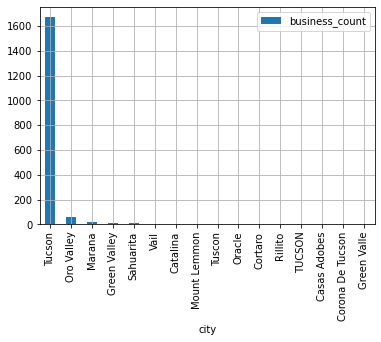

In [45]:
# plot the above data using matplotlib
import matplotlib.pyplot as plt
import pandas as pd

buisness_by_city_df= buisness_by_city.toPandas()
buisness_by_city_df.plot(kind='bar', x='city', y='business_count')
plt.grid()
plt.show()


In [86]:
buisness_by_city_df.head(10)    

,city,business_count
0,Tucson,1669
1,Oro Valley,56
2,Marana,16
3,Green Valley,10
4,Sahuarita,9
5,Vail,5
6,Catalina,4
7,Mount Lemmon,2
8,Tuscon,2
9,Oracle,1


In [46]:
# query for buisness names and their average ratings from tuscson city
spark.sql('''
select name  , stars , review_count, postal_code from shopping
          where city='Tucson'
          order by stars desc
          ''').show(15)

+--------------------+-----+------------+-----------+
|                name|stars|review_count|postal_code|
+--------------------+-----+------------+-----------+
|Charlie's Comic B...|  5.0|          28|      85710|
|Clarissa's Logo P...|  5.0|           9|      85714|
|      Sacred Machine|  5.0|          10|      85701|
|Arizona Flower Ma...|  5.0|          26|      85716|
|Tucson's Loop Bic...|  5.0|           6|      85718|
|       Ink by Hudson|  5.0|           5|      85756|
|Mattress Firm Tuc...|  5.0|           6|      85710|
|All American Eyeg...|  5.0|          25|      85719|
|Free Ever After B...|  5.0|          11|      85711|
|A To Z Stone and ...|  5.0|           8|      85713|
|Expressions Art G...|  5.0|           5|      85710|
|          LEO Armory|  5.0|           5|      85713|
|Krikawa Jewelry D...|  5.0|          13|      85701|
|   Creative Ventures|  5.0|           6|      85719|
|Tremendez Jewelry...|  5.0|          54|      85719|
+--------------------+-----+

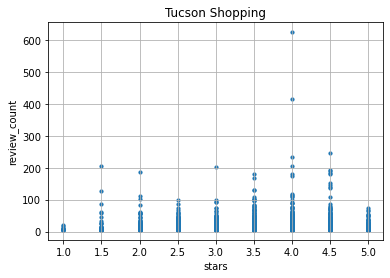

In [ ]:
# make a scatter plot of the above data
tucson_df= spark.sql('''
select name  , stars , review_count, postal_code from shopping
          where city='Tucson'
          order by stars desc
          ''').toPandas()   

tucson_df.plot(kind='scatter', x='stars', y='review_count', s=10)
plt.title('Tucson Shopping')
plt.grid()
plt.show()


In [84]:
tucson_df.head(10)

,name,stars,review_count,postal_code
0,Colonial Frontiers,5.0,5,85719
1,Abc Resurfacing,5.0,7,85715
2,Diamond Lil's Vintage & Gifts,5.0,8,85718
3,Ability Center,5.0,5,85705
4,ZOË Boutique,5.0,18,85719
5,Randy Prentice Piano Service,5.0,7,85716
6,Suncraft Beverages,5.0,5,85712
7,Mad Titan Toys,5.0,5,85712
8,Embellish Home,5.0,5,85715
9,Best Mattress,5.0,37,85705


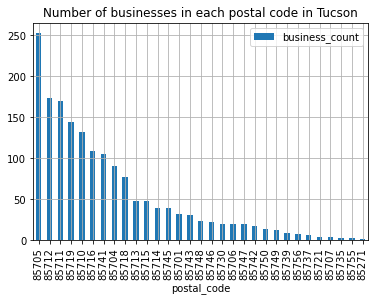

In [64]:
postal_q=spark.sql('''
select postal_code, count(*) as business_count from shopping 
          where city = 'Tucson'
            group by postal_code
          order by business_count desc
          ''').toPandas()


postal_q.plot(kind='bar', x='postal_code', y='business_count')
plt.title('Number of businesses in each postal code in Tucson')
plt.grid()
plt.show()

In [85]:
postal_q.head(10)

,postal_code,business_count
0,85705,253
1,85712,173
2,85711,170
3,85719,144
4,85710,132
5,85716,109
6,85741,105
7,85704,90
8,85718,77
9,85713,48


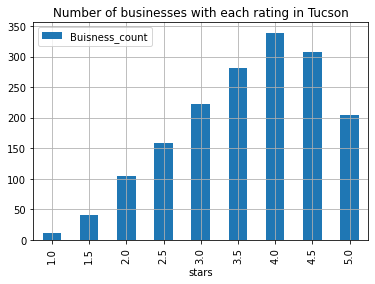

In [82]:
# find the number of business with each rating in Tucson
rating_q=spark.sql('''
select stars,  count(*) as Buisness_count from shopping
                   where city='Tucson'
                   group by stars
                   order by stars 
                   
                   ''').toPandas()

rating_q.plot(kind='bar',x='stars',y='Buisness_count')
plt.title('Number of businesses with each rating in Tucson')
plt.grid()
plt.show()



In [87]:
rating_q.head(10)   

,stars,Buisness_count
0,1.0,11
1,1.5,41
2,2.0,105
3,2.5,159
4,3.0,222
5,3.5,281
6,4.0,339
7,4.5,307
8,5.0,204


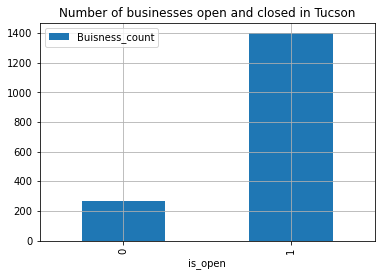

In [110]:
# now check how many buisness are open and closed in Tucson
open_q=spark.sql('''
select is_open, count(*) as Buisness_count from shopping
                   where city='Tucson'
                   group by is_open
                   order by is_open 
                   
                   ''').toPandas()

open_q.plot(kind='bar',x='is_open',y='Buisness_count')
plt.title('Number of businesses open and closed in Tucson')
plt.grid()
plt.show()
